In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import tensorflow as tf

In [3]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [6]:
X = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [7]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([7963, 2037], dtype=int64))

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
X

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [9]:
from sklearn.compose import ColumnTransformer
                                # tipo      #coluna    #preserva as outras colunas
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = ct.fit_transform(X) # Transformar em um matriz, a transformação vai primeira coluna

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

In [12]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.000000,0.000000,604.302960,1.000000,47.192960,1.600880,0.000000,3.000000,1.0,0.39912,103131.049546
1,0.000000,1.000000,0.000000,651.000000,1.000000,26.000000,5.000000,147037.320000,1.000000,0.0,0.00000,141763.260000
2,0.201696,0.000000,0.798304,689.327084,0.000000,51.815262,2.210174,0.000000,3.394913,1.0,0.00000,88645.882030
3,1.000000,0.000000,0.000000,432.000000,1.000000,42.000000,9.000000,152603.450000,1.000000,1.0,0.00000,110265.240000
4,0.000000,0.919318,0.080682,735.443181,0.080682,52.902273,3.000000,161401.186632,1.000000,1.0,0.00000,7647.141650


In [13]:
sc = StandardScaler()
X_train[:,[3, 5, 6, 7, 8, 11]] = sc.fit_transform(X_train[:,[3, 5, 6, 7, 8, 11]])
X_test[:,[3, 5, 6, 7, 8, 11]] = sc.transform(X_test[:,[3, 5, 6, 7, 8, 11]])

In [14]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.000000,0.000000,-0.487714,1.000000,0.612895,-1.252867,-1.319701,2.465727,1.0,0.39912,0.047238
1,0.000000,1.000000,0.000000,0.024556,1.000000,-1.511102,0.001404,1.066619,-0.837785,0.0,0.00000,0.720184
2,0.201696,0.000000,0.798304,0.445008,0.000000,1.076150,-1.028038,-1.319701,3.118027,1.0,0.00000,-0.205084
3,1.000000,0.000000,0.000000,-2.377893,1.000000,0.092447,1.477398,1.156954,-0.837785,1.0,0.00000,0.171510
4,0.000000,0.919318,0.080682,0.950905,0.080682,1.185092,-0.736593,1.299736,-0.837785,1.0,0.00000,-1.616025


In [15]:
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.471868,0.528132,0.000000,0.275914,0.000000,0.404390,0.627568,1.032352,-0.837785,1.000000,0.471868,0.720822
1,0.000000,0.932765,0.067235,-0.761789,1.000000,-0.254533,-1.424972,0.839052,-0.837785,1.000000,0.067235,0.095802
2,0.000000,1.000000,0.000000,0.156197,1.000000,0.794000,0.739401,0.565349,2.465727,1.000000,1.000000,-0.279763
3,0.507317,0.000000,0.492683,0.635456,0.492683,0.879554,-1.479991,-1.288672,0.000179,1.000000,0.000000,1.338683
4,0.059794,0.000000,0.940206,-1.388843,0.940206,0.834295,0.111723,-1.319701,-0.837785,0.059794,1.000000,0.797514


In [16]:
# Criando um modelo sequencial
ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=6, activation='relu'), # se x > 0 retorna x se não retorna 0
    tf.keras.layers.Dense(units=6, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Faz cálculo tras valores entre 0 a 1 
])

In [17]:
#ann.add(tf.keras.layers.Dense(units=6, activation='relu'))   é possível add dps
#ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
#ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [18]:
# Compilando o modelo com o otimizador 'adam', função de perda 'binary_crossentropy' e a métrica de 'accuracy'
ann.compile(
    optimizer = 'adam',  # Responsável por orientar o aprendizado do modelo ao longo do tempo, permitindo que ele faça previsões mais precisas e minimize o erro
    loss = 'binary_crossentropy', # É a função que calcula o erro entre a previsão e o valor real, fornecendo um valor de perda. quanto maior o valor pior
    metrics = ['accuracy']  # 'accuracy' será monitorada durante o treinamento, calculando a proporção de previsões corretas. threshold x >= 0.5 padrão
)

In [19]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [20]:
# Treinando o modelo com os dados de treinamento (X_train e y_train) por 100 épocas e usando lotes de 32 amostras por vez
ann.fit(
    X_train, y_train,
    batch_size = 32,  # O modelo processará 312 amostras por vez, antes de atualizar os pesos.
    epochs = 70  # O modelo passará por todo o conjunto de treinamento 70 vezes durante o treinamento.
)

Epoch 1/70
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 507us/step - accuracy: 0.5888 - loss: 0.6661
Epoch 2/70
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step - accuracy: 0.7121 - loss: 0.5744
Epoch 3/70
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.7353 - loss: 0.5368
Epoch 4/70
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.7565 - loss: 0.4975
Epoch 5/70
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.7600 - loss: 0.4876
Epoch 6/70
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.7712 - loss: 0.4813
Epoch 7/70
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 479us/step - accuracy: 0.7804 - loss: 0.4619
Epoch 8/70
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.7818 - loss: 0.4594
Epoch 9/70
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - accuracy: 0.7847 - loss: 0.4444
Epoch 10/70
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.7809 - loss: 0.4580
Epoch 11/70
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.7905 - loss: 0.4431
Epoch 12/70
399/399 ━━━━━━━━━━

In [21]:
bob = np.array([[600,'France', "Male", 40, 3, 60000, 2, 1, 1, 50000]])
bob[:, 2] = le.transform(bob[:, 2])
bob = ct.transform(bob)
bob[:, [0,3,4,5,6,9]] = sc.transform(bob[:, [0,3,4,5,6,9]])
bob = bob.astype(float)
print(ann.predict(bob)>0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[False]]


In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step


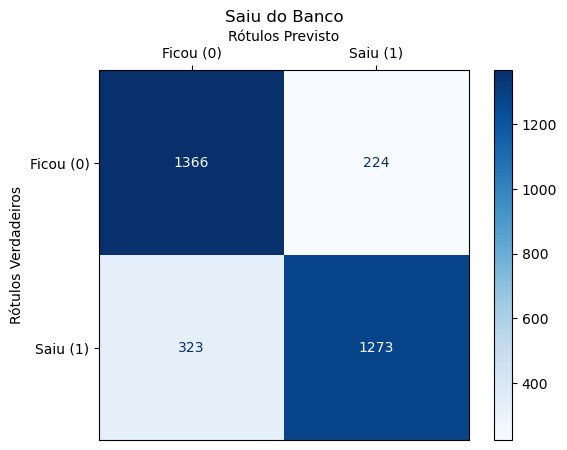

Acurácia: 82.83%


In [23]:
# Define os rótulos que serão exibidos na matriz de confusão
labels = ['Ficou (0)', 'Saiu (1)']

# Cria um objeto de exibição da matriz de confusão usando a matriz 'cm' e os rótulos especificados
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)  # Substitui 0 e 1 pelos rótulos definidos

# Cria uma nova figura e eixo para o gráfico da matriz de confusão
fig, ax = plt.subplots()

# Plota a matriz de confusão com a coloração azul
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Move os rótulos do eixo x para a parte superior do gráfico
ax.xaxis.set_ticks_position('top')  # Coloca os rótulos do eixo x na parte superior
ax.xaxis.set_label_position('top')  # Coloca o rótulo do eixo x na parte superior

# Rotaciona os rótulos do eixo x, se necessário, para melhor legibilidade
plt.xticks(rotation=0)  # Rotaciona os rótulos se necessário

# Define o título e os rótulos dos eixos
plt.title("Saiu do Banco")  # Título do gráfico
plt.xlabel("Rótulos Previsto")  # Rótulo do eixo X em português
plt.ylabel("Rótulos Verdadeiros")  # Rótulo do eixo Y em português

# Exibe o gráfico da matriz de confusão
plt.show()

# Imprime a acurácia do modelo em formato percentual
print(f"Acurácia: {ac:.2%}")